In [4]:
from hmf import Transfer

In [17]:
teh_nl_tk = Transfer(transfer_model="EH", takahashi=True, z= 8.0)
teh_nl_ntk = Transfer(transfer_model="EH", takahashi=False, z=8.0)


In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [20]:
teh_nl_tk.update(z=0)

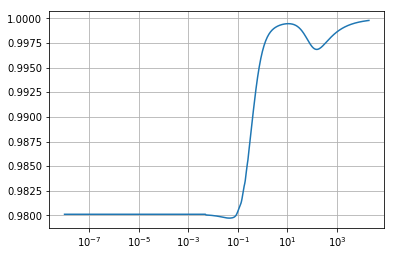

In [22]:
plt.plot(teh_nl_tk.k, np.abs(teh_nl_ntk.nonlinear_power/teh_nl_tk.nonlinear_power -1))
#plt.plot(teh_nl_ntk.k, teh_nl_ntk.nonlinear_power)
#plt.plot(teh_nl_ntk.k, teh_nl_ntk.power)

plt.xscale('log')
#plt.yscale('log')
plt.grid(True)

In [8]:
np.log(1e3)

6.9077552789821368

In [11]:
from astropy.cosmology import Planck15

In [15]:
Planck15.Om(8.0)

0.99009841609741556

In [19]:
#Nbodykit
#from nbodykit.lab import *
#from nbodykit import setup_logging
#from nbodykit.lab import cosmology
#setup_logging() # log output to stdout

#HMF
from hmf import cosmology as cm
from hmf import density_field
#from density_field import transfer

import numpy as np
import matplotlib
#matplotlib.use('Agg') only when working from terminal

import matplotlib.pyplot as plt

# Import the science packages/libraries
import scipy, scipy.interpolate, scipy.misc, scipy.integrate
from scipy.interpolate import interp1d
import math
import random
#from IPython.display import display, Math


# In[4]:


# PLANCK15 cosmology:
#cosmonbody= cosmology.Planck15  #nbodykit cosmology
my_cosmo = cm.Cosmology() #hmf cosmology, again Planck15
zbin=1.35
lx=1500  # in Mpc, box cube side
ngrid=400 #grid of the cube

#Modes
a=2*np.pi/lx #smallest k
b=ngrid*np.pi/lx #biggest k
npt=140 #number of k
kparal=np.linspace(a,b,npt) #k  parallel data vector
ktotal=0.5*(kparal[1:]+kparal[:-1]) #k's (cfr. https://github.com/franciscovillaescusa/Pylians/blob/a5d9862dff855e07626ce62992f8273741e22e77/Pk/1D/Pk_1D.py)
kperpend=np.sqrt(ktotal**2-kparal[:-1]**2) #perpendicular modes


# In[5]:


# Nbodykit power spectra
# P_nw =cosmology.LinearPower(cosmonbody,redshift=zbin,transfer='NoWiggleEisensteinHu')
# P_w =cosmology.LinearPower(cosmonbody,redshift=zbin,transfer='EisensteinHu')
# P_wh =cosmology.HalofitPower(cosmonbody,redshift=zbin) #nbodykit Halofit


# In[6]:


#halofit di hmf ha bisogno di vettori, quindi riempio vettori
#plinnbody=np.zeros(len(ktotal))
#plinnbody_nw=np.zeros(len(ktotal))
#pnlinnbody=np.zeros(len(ktotal))

#plinnbody=P_w(ktotal) 
#pnlinnbody=P_wh(ktotal) #nbodykit halofit
#plinnbody_nw=P_nw(ktotal)

#pnorm=plinnbody*ktotal**3/(2*np.pi**2) #dimensionless power spectrum 
#pnorm_nw=plinnbody_nw*ktotal**3/(2*np.pi**2) #dimensionless nowiggles power spectrum


# In[7]:


#Plot check
#plt.plot(ktotal,pnorm)
#plt.plot(ktotal,pnorm_nw)


# In[8]:

sigma_8=0.8
#sigma_8=cosmonbody.sigma8  #sigma8 
#print(sigma_8)


# In[9]:
t = Transfer(transfer_model='EH')
k = t.k

pnorm = t.power * k**3 / (2*np.pi**2)
pnorm_ = interp1d(k, pnorm)(ktotal)
pnlw=density_field.halofit(ktotal, pnorm_, sigma_8, zbin, cosmo=my_cosmo.cosmo, takahashi=True) #Generate (?) non-linear wiggles with halofit
#pnlnw=density_field.halofit.halofit(ktotal,pnorm_nw, sigma_8, zbin, cosmo=my_cosmo, takahashi=True) #Generate (?) non-linear no-wiggles with halofit

In [17]:
interp1d?

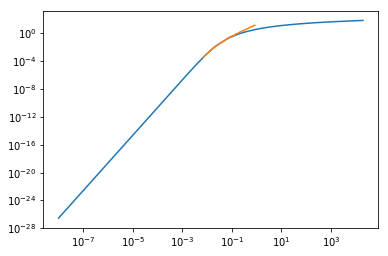

In [21]:
plt.plot(k, pnorm)
plt.plot(ktotal,pnlw)
plt.xscale('log')
plt.yscale('log')

In [12]:
pnlw

array([2.90855454e-27, 3.54660652e-27, 4.32462848e-27, 5.27332575e-27,
       6.43013951e-27, 7.84072446e-27, 9.56075057e-27, 1.16581002e-26,
       1.42155471e-26, 1.73340233e-26, 2.11366021e-26, 2.57733557e-26,
       3.14272778e-26, 3.83215053e-26, 4.67281252e-26, 5.69789120e-26,
       6.94784224e-26, 8.47199605e-26, 1.03305047e-25, 1.25967160e-25,
       1.53600678e-25, 1.87296184e-25, 2.28383500e-25, 2.78484175e-25,
       3.39575475e-25, 4.14068424e-25, 5.04902951e-25, 6.15663923e-25,
       7.50722619e-25, 9.15409252e-25, 1.11622333e-24, 1.36109015e-24,
       1.65967360e-24, 2.02375755e-24, 2.46771089e-24, 3.00905464e-24,
       3.66915341e-24, 4.47405858e-24, 5.45553645e-24, 6.65232193e-24,
       8.11164721e-24, 9.89110587e-24, 1.20609258e-23, 1.47067409e-23,
       1.79329707e-23, 2.18669411e-23, 2.66639097e-23, 3.25131933e-23,
       3.96456391e-23, 4.83427352e-23, 5.89477204e-23, 7.18791298e-23,
       8.76473131e-23, 1.06874576e-22, 1.30319738e-22, 1.58908085e-22,
      

In [7]:
density_field.halofit

<function hmf.density_field.halofit.halofit(k, delta_k, sigma_8, z, cosmo=None, takahashi=True)>